<img style="float: left; padding-right: 10px; width: 45px" src="https://upload.wikimedia.org/wikipedia/fr/b/b1/Logo_EPF.png?raw=true"> 

**Introduction to Machine Learning - P2025: Energy & Environment**

## Lab 2:  Feature engineering
*Credits*: Adapted from MDE's "Intro to ML" course by Y. Idrissi and I. Chafai.

**First name:**

**Last name:**

**Group:**


---

# Introduction
During your project, you will work on a Kaggle challenge. To start off, you are going to practice with their "tutorial" challenge: the [Titanic data](https://www.kaggle.com/competitions/titanic).

Here is the **challenge definition** given by Kaggle:

>The sinking of the Titanic is one of the most infamous shipwrecks in history.  
>On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.  
>While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.  
>In this challenge, we ask you to **build a predictive model that answers the question: “what sorts of people were more likely to survive?”** using passenger data (ie name, age, gender, socio-economic class, etc).



# Table of contents
- Overview of the data
- First model (quick and dirty)
- Feature engineering (including Exploratory data analysis)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import warnings
warnings.filterwarnings('ignore')


# **Overview of the data**
Here is a snippet to load the data, followed by a description of each column.

In [2]:
df = pd.read_csv('titanic.csv', sep = ',')
df.set_index('PassengerId', inplace = True, drop = True)
df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S



* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

Pandas's `.info()` let's you know data types and the count of non-empty values for each column:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


The dataset has some null values that we will need to deal with. 
- You can get rid of rows with missing data by calling `.dropna()` on the dataframe.
- You can fill in missing values with a given value using [`.fillna(value)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html).

# Model zero: quick and dirty baseline

A very important point in Machine Learning and Data Science is to rapidly build a first model that can serve as **baseline**. 

With the first model in place, then we can appreciate adding new features and use new algorithm and see effects on performances.

We can see that at least `Fare`, `SibSp` and `Parch` are immidiately usable for modelling. In fact they are int/float and they don't have null values.

Bellow is a little function that splits this data frame in the two parts used for training: input features `X` and target variable `y`.

<div class="alert alert-info exercise" >

#### 👉**Exercise** (5 min)

**Complete** the function bellow to include the three variables mentioned above.


</div>

In [4]:
def parse_data_for_model_0(df: pd.DataFrame) -> (pd.DataFrame, pd.Series):
    #TODO complete the code bellow with the variable names
    # input features
    X = df[['Fare','SibSp','Parch']].copy()
    # output variable
    target = df.Survived.copy()
    return X, target

# NOTE: this function declaration includes types for the input argument df 
# (pd.DataFrame) and for the output arguments (X, target -> pd.DataFrame, pd.Series)
# This is optional in python, but it's done here so that 
# data types of all arguments are clear for you.

Now we apply the function to `df` and check out the result:

In [5]:
X, y = parse_data_for_model_0(df)

In [8]:
X.head(10)

,Fare,SibSp,Parch
PassengerId,,,
1,7.2500,1,0
2,71.2833,1,0
3,7.9250,0,0
4,53.1000,1,0
5,8.0500,0,0
6,8.4583,0,0
7,51.8625,0,0
8,21.0750,3,1
9,11.1333,0,2


Now we have the data, fitting the model is straightforward.


However, we also need a  way to asses model performance.
As mentioned in the lecture, when we have limited data points, it is better to use **cross validation**.
You can do this easily with `sklearn`'s function `cross_val_score`.

In [9]:
from sklearn.model_selection import cross_val_score

def compute_score(estimator, X: pd.DataFrame, y: pd.Series) -> float:
    xval = cross_val_score(estimator, X, y, cv = 5)
    return np.mean(xval)

In [10]:
from sklearn.linear_model import LogisticRegression

logisticRegression = LogisticRegression()

compute_score(logisticRegression, X, y)

0.6746092524009792

This classification score reflects the model's prediction **accuracy**, that is, its rate of correct predictions.

# **Exploratory data analysis: EDA**

EDA is a very important step to detect good features to add to a machine learning model. We will implement a method to plot feature distribution and we will do a simple EDA on a variable.

You can re-use this method for the open ended part of the lab.

## Example: Observing distribution of `Pclass` variable, split by survival

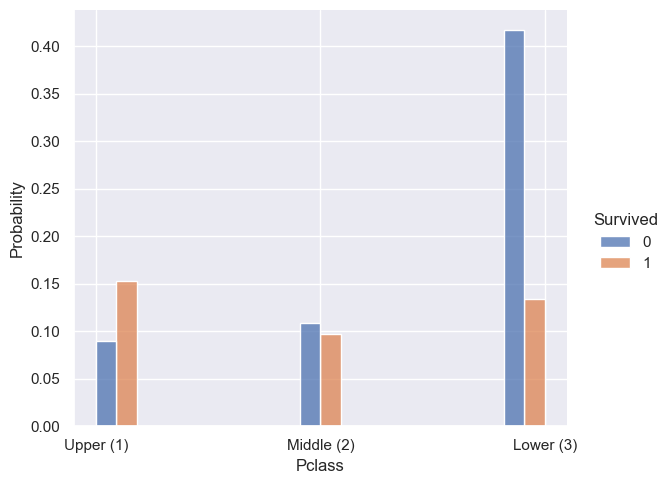

In [11]:
import seaborn as sns

sns.displot(data=df,
            x='Pclass', 
            hue='Survived', 
            stat="probability",
            # bellow some args to make plot prettier
            # can be removed/changed for other plots
            multiple='dodge', 
            aspect=1.2)
plt.gca().set_xticks([1,2,3],['Upper (1)', 'Middle (2)','Lower (3)']);

In this double histogram, blue represents the non-surviving population, while red represents the surviving population.

<div class="alert">

#### ❓ **Question :** 
What conclusions can you draw from this graph ?

</div>

**Answer here** :

# Model 1: Including a new variable
Since `Pclass` seemed related to survival changes, let's use this new variable in the model.

Note that `Pclass` is a [categorical variable (🇫🇷 _variable catégorielle_)](https://datafranca.org/wiki/Caract%C3%A9ristique_cat%C3%A9gorielle). It can take one of three variables, corresponding to the three socio-economic classes:

In [12]:
df['Pclass'].unique()  # unique shows all unique values within the column

array([3, 1, 2], dtype=int64)

To include this kind of variable in a linear model, it is better to encode each of the possible values in its own (binary) column. These new columns are called [**dummy variables** (🇫🇷 _variable factice_ )](https://datafranca.org/wiki/Variable_factice).

In this case, `Pclass` generates three corresponding dummies. `pd.get_dummies` can do this process automatically for us:

In [13]:
pd.get_dummies(df['Pclass'], prefix = 'Pclass')

,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,
1,False,False,True
2,True,False,False
3,False,False,True
4,True,False,False
5,False,False,True
...,...,...,...
887,False,True,False
888,True,False,False
889,False,False,True


Let's make a function that takes care of preparing the data for our next model:

In [14]:
def parse_data_for_model_1(df):
    # input features
    X = df[['Fare', 'SibSp', 'Parch', 'Pclass']].copy()
    # output variable
    target = df.Survived.copy()
    # NEW add dummy columns for Pclass
    class_dummies = pd.get_dummies(X['Pclass'], prefix = 'Pclass')
    X = X.join(class_dummies).copy()
    # NEW Drop original column Pclass
    X = X.drop(columns=['Pclass'])
    return X, target


In [15]:
X, y = parse_data_for_model_1(df.copy())
X.head(10)

,Fare,SibSp,Parch,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,
1,7.2500,1,0,False,False,True
2,71.2833,1,0,True,False,False
3,7.9250,0,0,False,False,True
4,53.1000,1,0,True,False,False
5,8.0500,0,0,False,False,True
6,8.4583,0,0,False,False,True
7,51.8625,0,0,True,False,False
8,21.0750,3,1,False,False,True
9,11.1333,0,2,False,False,True


<div class="alert alert-info exercise" >

#### 👉**Exercise** (5 min)

Train and evaluate this new model using cross-validation, like done for the baseline model.

Compare the score of this model with the previous one? Is it better or worse?
</div>

In [108]:
# TODO Your code here

## Visualize and interpret feature weights

Logistic regression is a linear model, in which each variable is pondered by a coefficient. Let's fit an individual model to our data so we can examine the coefficient values:

In [39]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X, y)
print(logisticRegression.coef_)

[[ 0.00675618 -0.15072925  0.23372253  0.37803728  0.10814039 -0.84382307]]


Using the column names from `X`, we can even visualise these in a table or plot.

Let's implement a method to plot feature weights in case of Logistic Regression

{
  "Fare": 0.006756177054693814,
  "SibSp": -0.15072925216499858,
  "Parch": 0.2337225258359938,
  "Pclass_1": 0.37803727531456505,
  "Pclass_2": 0.10814038815253313,
  "Pclass_3": -0.8438230719738237
}


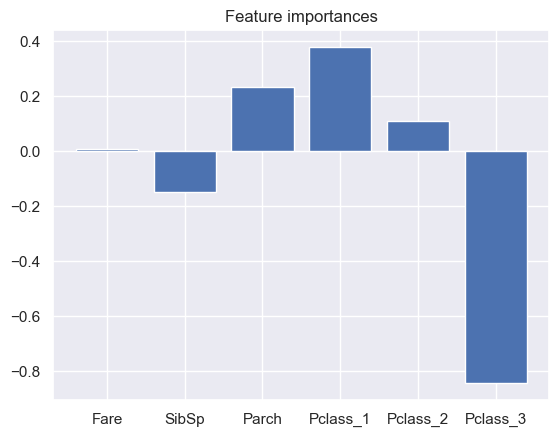

In [45]:
import json

def plot_var_weights_logistic_regression(X, y):
  lr = LogisticRegression()
  lr.fit(X, y)

  columns = np.array(X.columns)
  weights = np.array(lr.coef_[0])

  # weights dictonary sorted by absolute value
  weights_dict = dict(zip(columns, weights))
  print(json.dumps(weights_dict, indent = 2))

  # plot the weights
  plt.bar(columns, weights)
  plt.title('Feature importances')
  plt.show()

plot_var_weights_logistic_regression(X, y)

These weghts help us interpret how each variable influences the model's decision.

**Interpretation of weights in Linear Models**


*   A positive weight increases the probability of `target` = 1 (survived)
*   A negative weight decreases the probability of surviving
*   When a weight is close to zero, it means that the correspond feature doesn't influence the predictio

**Conclusion for our model**
`Pclass_1` and `Pclass_3` seem very important in our model in comparison to `Pclass_2`. It shows also that Fare is not important for our prediction using a linear model.

<br>

Let's continue with other variables

# **Children and women first !** (more EDA + models 2 and 3)

The history of the titanic reports that they were different rescue policies led by officer Charles Lightholler and officer William Murdoch. They didn't have the same interpretation of "children and women first". 

In fact, Murdoch, starboard side, was giving the priority but not the exclusivity to children and women. He let men onboard the rescue boats to fill the boards instead of waiting for the arrival of additional children and women.

On the other side, Lightholler, refused all men and prefered waiting for children and women to fill the lifeboats. Unfortunately, this second strategy was not optimal as they were only 500 children and women but they were 1200 seats on the rescue boats...




# Model 2: considering `Sex` and `Age`

<div class="alert alert-info exercise" >

#### 👉 **Exercise** (20 min)
1. Do statistics on `Sex` and `Age` features and then include them in a LogisticRegression model. 
  - Plot histograms for both variables using `sns.displot`. 
  - Complete the function `parse_data_for_model_2` to build the input data for your model.
  - `Sex` is again a categorical variable. Prepare it to usage in the model by creating corresponding **dummy variables**.
2. Have a look at the score and feature importances, then interpret the results.

Note : The `Age` variable has missing values, at this stage you can just fill null values with the median age by calling `.fillna('median')`

</div>

In [ ]:
# TODO Histogram of Age

In [ ]:
# TODO Histogram of Sex

In [ ]:
#### TODO YOUR CODE HERE ####
def parse_data_for_model_2(df):
    #TODO complete with the variables for this model
    # input features 
    X = df[[...]]
    # create dummy variables for Sex
    dummies = pd.get_dummies(...)
    # add variables to X, then remove the original variable
    X = X.join(dummies)
    X = X.drop(columns=['Sex'])
    # Fill missing values for Age
    X['Age'] = X['Age'].fillna(np.nanmedian(X['Age']))
    # target variable
    y = df.Survived
    return X, y

In [ ]:
# TODO Complete the code
# create the estimator and compute the score
X, y = ...
estimator = ...
score = compute_score(...)
print('score:', score)

# Plot feature importance with plot var weights ...
plot_var_weights_logistic_regression(...)

<div class="alert">

#### ❓ **Question**
What do the feature importances tell you? Did `Age` help predict survival? Did `Sex` help predict survival?

</div>

<div class="alert alert-info exercise" >

#### 👉 **Exercise** (10 min)

Based on the histogram for `Age`, define a new feature `is_child` when `Age` is less than some threshold. 
Then create a third model including this variable. 
**Does it improve the model's score ?**
</div>

In [ ]:
#### CODE HERE ####
def parse_data_for_model_3(df):
    #TODO Complete the function
    # input features 
    X = df[[...]]
    # create dummy variables for Sex
    dummies = pd.get_dummies(...)
    # add variables to X, then remove the original variable
    X = X.join(dummies)
    X = X.drop(columns=['Sex'])
    # Fill missing values for Age
    X['Age'] = X['Age'].fillna(np.nanmedian(X['Age']))
    #TODO New variable is_child
    threshold = ...
    X['is_child'] = X['Age'] < threshold
    # target variable
    y = df.Survived
    return X, y


# Train and evaluate model
X, y = ...
estimator = ...
compute_score(...)

# Plot feature importances
plot_var_weights_logistic_regression(...)

<div class="alert">

#### ❓ **Question**
What do the feature importances tell you? Did `is_child` help predict survival better than `Age`? 

</div>

# **Extra: Non-linear models** (with random forests)
What we just did with the new feature `is_child` is add non-linear dependency that a linear model like Logistic Regression can't capture without our help.

Let's try non-linear models. **However, remember that creating new features manually is still the best method to get the best results and performances out of models.**

<div class="alert alert-info exercise" >

#### 👉 **Exercise : Random Forest to the rescue**

Use a Random Forest classifier with the features we defined above but do not use `is_child` yet.

</div>

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#### TODO CODE HERE ####
estimator = RandomForestClassifier()

X, y = ...
compute_score(...)


As you may know, when using Decision Trees, we no longer have the weights of variables which is not ideal and hurts our model's interpretability.

However we can use a feature importance method that comes with Random Forest classifiers in `sklearn`. It computes the relative importance of features. This method should be added to your toolbox, it will allow you to somewhat interpret the results of your Random Forest. 

<div class='alert alert-success'>

💡 You can check the result of this method in the variable `.feature_importances_` of your `estimator`, once you have trained it. The names of the features can be seen in `X.columns`.

</div>



<div class="alert alert-info exercise" >

#### 👉 **Exercise**

Compute feature importances of your Random Classifier model and interpret the results. How does it compare to the linear model ? Do both models select the same features as important ? Why ?

You can find documentation here https://mljar.com/blog/feature-importance-in-random-forest/

</div>

In [ ]:
#### TODO YOUR CODE HERE ####

# Create estimator
estimator= ...
# Train on the input data with fit
estimator...

# Show feature importances on a nice barplot with sns:
sns.barplot(x=X.columns, y=estimator.feature_importances_)

<div class="alert">

#### ❓ **Question**
What do the feature importances tell you? Was `RandomForest` able to take `Age` into account better than `LinearRegression`? Do you think adding the `is_child` variable is necessary now?

</div>

<div class="alert alert-info exercise">

#### 👉 **Open ended exercise**

Use other variables using techniques presented here and some creativity on existing variables.

Do EDA on variables to argument your choices, use plots, correlation etc...

</div>

In [ ]:
#### CODE HERE ####
